In [1]:
#load the data
import pickle
import numpy as np

In [2]:
with open('train_qa.txt','rb') as f:
    train_data = pickle.load(f)

In [3]:
with open('test_qa.txt','rb') as f:
    test_data = pickle.load(f)

In [5]:
type(test_data)

list

In [8]:
type(train_data)

list

In [9]:
len(train_data)

10000

In [10]:
len(train_data)

10000

In [15]:
#huge list with tuples
train_data[0]
#We see story, question,answer

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [17]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [18]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [19]:
train_data[0][2]

'no'

In [20]:
all_data = test_data+train_data

In [21]:
len(all_data)

11000

In [22]:
#story
set(train_data[0][0])

{'.',
 'Mary',
 'Sandra',
 'bathroom',
 'bedroom',
 'journeyed',
 'moved',
 'the',
 'to'}

In [23]:
#set in python to add my words to get set of unique words
vocab = set()

#union in sets- all distinct elements
for story,question,answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [24]:
vocab.add('no')
#yes and no are two possible outcomes

In [25]:
vocab.add('yes')

In [26]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [28]:
#vocab
vocab_len =len(vocab) + 1
vocab_len
#coz we will use pad_sequences and we need holder for that

38

In [34]:
all_data[0]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')

In [35]:
#longest story
all_story_len = [len(data[0]) for data in all_data]
all_story_len

[12,
 23,
 35,
 47,
 59,
 13,
 26,
 37,
 50,
 62,
 12,
 24,
 37,
 49,
 60,
 12,
 25,
 38,
 50,
 62,
 12,
 24,
 36,
 47,
 59,
 12,
 25,
 36,
 48,
 59,
 12,
 26,
 39,
 51,
 63,
 13,
 24,
 37,
 50,
 62,
 13,
 26,
 38,
 50,
 63,
 13,
 25,
 36,
 49,
 61,
 13,
 26,
 39,
 51,
 64,
 13,
 25,
 37,
 50,
 62,
 13,
 25,
 37,
 50,
 61,
 12,
 25,
 38,
 50,
 62,
 12,
 25,
 37,
 50,
 61,
 12,
 25,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 60,
 13,
 25,
 37,
 49,
 60,
 13,
 25,
 39,
 51,
 64,
 12,
 25,
 37,
 49,
 61,
 12,
 25,
 38,
 50,
 61,
 12,
 24,
 36,
 49,
 62,
 13,
 25,
 37,
 50,
 62,
 12,
 23,
 35,
 47,
 59,
 12,
 25,
 37,
 48,
 73,
 12,
 24,
 37,
 49,
 61,
 12,
 24,
 37,
 49,
 62,
 14,
 26,
 37,
 49,
 62,
 12,
 23,
 35,
 48,
 59,
 12,
 24,
 36,
 49,
 61,
 13,
 25,
 37,
 49,
 61,
 12,
 25,
 37,
 50,
 62,
 12,
 24,
 36,
 47,
 58,
 12,
 24,
 36,
 48,
 61,
 25,
 38,
 50,
 62,
 74,
 13,
 25,
 37,
 49,
 62,
 12,
 24,
 37,
 49,
 62,
 12,
 24,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 61,
 12,
 25,
 36,
 50,
 62,


In [36]:
max_story_len = max(all_story_len)
max_story_len

156

In [38]:
max_question_len = max([len(data[1]) for data in all_data])
max_question_len

6

In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [41]:
from keras_preprocessing.sequence import pad_sequences

In [44]:
#we dont want any filters
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [45]:
tokenizer

In [47]:
tokenizer.word_index

{'to': 1,
 'bathroom': 2,
 'put': 3,
 'discarded': 4,
 'went': 5,
 'picked': 6,
 'the': 7,
 'dropped': 8,
 'sandra': 9,
 'football': 10,
 'yes': 11,
 'in': 12,
 '?': 13,
 '.': 14,
 'milk': 15,
 'journeyed': 16,
 'hallway': 17,
 'no': 18,
 'grabbed': 19,
 'back': 20,
 'took': 21,
 'bedroom': 22,
 'there': 23,
 'up': 24,
 'got': 25,
 'travelled': 26,
 'john': 27,
 'left': 28,
 'moved': 29,
 'kitchen': 30,
 'garden': 31,
 'daniel': 32,
 'office': 33,
 'apple': 34,
 'mary': 35,
 'down': 36,
 'is': 37}

In [48]:
#above is lower case automatically, above showing word index
train_story_text = []
train_question_text = []
train_answers = []

In [49]:
for story, question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [53]:
#train_story_text

In [54]:
#train_question_text
len(train_question_text)

10000

In [55]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)
train_story_seq
#converting text to sequences

[[35, 29, 1, 7, 2, 14, 9, 16, 1, 7, 22, 14],
 [35,
  29,
  1,
  7,
  2,
  14,
  9,
  16,
  1,
  7,
  22,
  14,
  35,
  5,
  20,
  1,
  7,
  22,
  14,
  32,
  5,
  20,
  1,
  7,
  17,
  14],
 [35,
  29,
  1,
  7,
  2,
  14,
  9,
  16,
  1,
  7,
  22,
  14,
  35,
  5,
  20,
  1,
  7,
  22,
  14,
  32,
  5,
  20,
  1,
  7,
  17,
  14,
  9,
  5,
  1,
  7,
  30,
  14,
  32,
  5,
  20,
  1,
  7,
  2,
  14],
 [35,
  29,
  1,
  7,
  2,
  14,
  9,
  16,
  1,
  7,
  22,
  14,
  35,
  5,
  20,
  1,
  7,
  22,
  14,
  32,
  5,
  20,
  1,
  7,
  17,
  14,
  9,
  5,
  1,
  7,
  30,
  14,
  32,
  5,
  20,
  1,
  7,
  2,
  14,
  32,
  6,
  24,
  7,
  10,
  23,
  14,
  32,
  5,
  1,
  7,
  22,
  14],
 [35,
  29,
  1,
  7,
  2,
  14,
  9,
  16,
  1,
  7,
  22,
  14,
  35,
  5,
  20,
  1,
  7,
  22,
  14,
  32,
  5,
  20,
  1,
  7,
  17,
  14,
  9,
  5,
  1,
  7,
  30,
  14,
  32,
  5,
  20,
  1,
  7,
  2,
  14,
  32,
  6,
  24,
  7,
  10,
  23,
  14,
  32,
  5,
  1,
  7,
  22,
  14,
  27,
  26,
  1,
  7

In [56]:
def vectorize_Stories(data,word_index=tokenizer.word_index,
                      max_story_len=max_story_len,
                      max_question_len=max_question_len):
    #Stories =X
    X =[]
    #Questions = Xq
    Xq =[]
    #answer
    Y=[]
    for story,query,answer in data:
        #for each story
        #[23,14,..]
        x=[word_index[word.lower()] for word in story]
        xq=[word_index[word.lower()] for word in query]
        y=np.zeros(len(word_index)+1)

        y[word_index[answer]] = 1
        X.append(x)
        Xq.append(xq)
        Y.append(y)

    return (pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen =max_question_len),np.array(Y))

In [57]:
inputs_train, queries_train, answers_train = vectorize_Stories(train_data)

In [58]:
input_test,queries_test,answers_test =vectorize_Stories(test_data)

In [59]:
input_test

array([[ 0,  0,  0, ...,  7, 22, 14],
       [ 0,  0,  0, ...,  7, 31, 14],
       [ 0,  0,  0, ...,  7, 31, 14],
       ...,
       [ 0,  0,  0, ...,  7, 34, 14],
       [ 0,  0,  0, ...,  7, 31, 14],
       [ 0,  0,  0, ..., 34, 23, 14]])

In [60]:
tokenizer.word_index['yes']

11

In [61]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
       497.,   0.,   0.,   0.,   0.,   0.,   0., 503.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [62]:
from keras.models import Sequential,Model

In [63]:
from tensorflow.keras.layers import Embedding

In [66]:
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [67]:
#PLACEHOLDER shape =(max_stroy_len,batch_size)
input_sequence = Input((max_story_len,))
question=Input((max_question_len,))

In [68]:
#vocab_len
vocab_size = len(vocab) +1
vocab_size

38

In [69]:
#Input Encoder M
input_encoder_m= Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))
#% of neurons have been turned off a % randomly.That helps with overfitting


#(samples,story_maxlen,embedding_dim)

In [70]:
#Input Encoder C
input_encoder_c= Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

In [71]:
#Input Encoder
question_encoder= Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))

C:\Users\HOME\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [72]:
#encoded -- > encoder(input)
input_encoded_m =input_encoder_m(input_sequence)
input_encoded_c =input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [73]:
match = dot([input_encoded_m,question_encoded],axes=(2,2))
match=Activation('softmax')(match)

In [74]:
input_encoded_c.shape

(None, 156, 6)

In [75]:
match.shape

(None, 156, 6)

In [76]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [78]:
answer = concatenate([response,question_encoded])
answer

<KerasTensor shape=(None, 6, 220), dtype=float32, sparse=False, name=keras_tensor_21>

In [79]:
answer = LSTM(32)(answer)

In [80]:
answer

<KerasTensor shape=(None, 32), dtype=float32, sparse=False, name=keras_tensor_22>

In [81]:
answer =Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)
#(samples,vocab_size) #yes/no

In [82]:
answer = Activation('softmax')(answer)

In [83]:
answer

<KerasTensor shape=(None, 38), dtype=float32, sparse=False, name=keras_tensor_25>

In [84]:
model = Model([input_sequence,question],answer)

In [88]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [89]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 156)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 156, 64)   │      2,432 │ input_layer_2[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_2        │ (None, 6, 64)     │      2,432 │ input_layer_3[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 156, 6)    │          0 │ sequential[0][0], │
│                     │                   │            │ sequential_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 156, 6)    │          0 │ dot[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 156, 6)    │        228 │ input_layer_2[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 156, 6)    │          0 │ activation[0][0], │
│                     │                   │            │ sequential_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute (Permute)   │ (None, 6, 156)    │          0 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 6, 220)    │          0 │ permute[0][0],    │
│ (Concatenate)       │                   │            │ sequential_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 32)        │     32,384 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32)        │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 38)        │      1,254 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 38)        │          0 │ dense[0][0]       │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,730 (151.29 KB)

 Trainable params: 38,730 (151.29 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
#train
history = model.fit([inputs_train,queries_train],answers_train,batch_size=32,epochs=100,validation_data =([input_test,queries_test],answers_test))

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.4992 - loss: 0.6951 - val_accuracy: 0.4970 - val_loss: 0.6947
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5050 - loss: 0.6944 - val_accuracy: 0.4970 - val_loss: 0.6933
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.4966 - loss: 0.6949 - val_accuracy: 0.4970 - val_loss: 0.6958
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.4910 - loss: 0.6954 - val_accuracy: 0.5030 - val_loss: 0.6945
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4947 - loss: 0.6950 - val_accuracy: 0.4970 - val_loss: 0.6966
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.4981 - loss: 0.6954 - val_accuracy: 0.4970 - val_loss: 0.6959
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4941 - loss: 0.6954 - val_accuracy: 0.5030 - val_loss: 0.6936
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5016 - loss: 0.6945 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


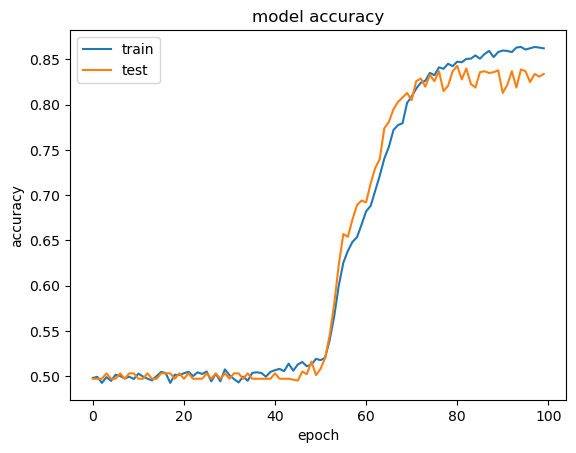

In [97]:
#Evaluation
import matplotlib.pyplot as plt

print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [98]:
pred_results =  model.predict(([input_test,queries_test]))

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


In [100]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [99]:
pred_results
#bunch of probabilities

array([[5.0323980e-08, 4.0347476e-08, 4.2954660e-08, ..., 4.4466361e-08,
        4.2919527e-08, 3.6996401e-08],
       [1.9070324e-08, 1.4141834e-08, 1.9527109e-08, ..., 1.6714337e-08,
        1.5345606e-08, 1.5132496e-08],
       [6.0309064e-09, 5.8399721e-09, 6.2519461e-09, ..., 5.1333706e-09,
        6.5407950e-09, 6.0170264e-09],
       ...,
       [3.8154035e-08, 2.7107586e-08, 2.9853684e-08, ..., 3.0236084e-08,
        2.7314098e-08, 2.6480043e-08],
       [1.1931592e-09, 1.1110420e-09, 1.3581264e-09, ..., 9.7357744e-10,
        1.2898248e-09, 1.2371048e-09],
       [2.3786213e-09, 2.3928550e-09, 2.8313927e-09, ..., 2.0854931e-09,
        3.0028640e-09, 2.6202291e-09]], dtype=float32)

In [102]:
pred_results.shape

(1000, 38)

In [103]:
pred_results[0]
#probabilty of every single word

array([5.0323980e-08, 4.0347476e-08, 4.2954660e-08, 4.8807312e-08,
       3.0617496e-08, 4.3012541e-08, 3.9925133e-08, 4.0197460e-08,
       4.7207067e-08, 4.5066958e-08, 4.4599719e-08, 5.4513913e-04,
       3.3230158e-08, 4.4635204e-08, 3.5284842e-08, 4.4737401e-08,
       5.2851860e-08, 4.0320014e-08, 9.9945337e-01, 4.1604189e-08,
       3.6474617e-08, 4.2732957e-08, 3.5291642e-08, 3.7743867e-08,
       4.7272479e-08, 4.5776833e-08, 4.0798092e-08, 3.5261365e-08,
       4.0197154e-08, 4.8776975e-08, 4.3260851e-08, 5.8274271e-08,
       4.1161936e-08, 4.0301561e-08, 4.2333415e-08, 4.4466361e-08,
       4.2919527e-08, 3.6996401e-08], dtype=float32)

In [104]:
val_max=np.argmax(pred_results[0])
#for maximum probability
val_max

18

In [105]:
for key, val in tokenizer.word_index.items():
    if val== val_max:
        k = key

In [106]:
k

'no'

In [108]:
#direct probabilty that john is in the kitchen
pred_results[0][val_max]
#it shows that there is .9994 % probabilty that john is in kitcchen

0.99945337

In [109]:
#these are only words i can use in vocab
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [112]:
#added space coz it shoukd be same format as above.
#writting our own stories
my_story = "John left the kitchen .  Sandra dropped  the football in the garden . "

In [113]:
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [119]:
my_question = "Is the football in the garden ?"

In [120]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [121]:
my_data = [(my_story.split(),my_question.split(),'yes')]
my_data

[(['John',
   'left',
   'the',
   'kitchen',
   '.',
   'Sandra',
   'dropped',
   'the',
   'football',
   'in',
   'the',
   'garden',
   '.'],
  ['Is', 'the', 'football', 'in', 'the', 'garden', '?'],
  'yes')]

In [122]:
my_story,my_ques,my_ans = vectorize_Stories(my_data)

In [123]:
my_ans

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [124]:
pred_results = model.predict(([my_story,my_ques]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [125]:
val_max= np.argmax(pred_results[0])
val_max

11

In [126]:
for key, val in tokenizer.word_index.items():
    if val ==  val_max:
        k=key

In [127]:
k

'yes'

In [128]:
pred_results[0][val_max]

0.85617024